In [112]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit
from scipy.stats import multivariate_normal

In [157]:
params = lmfit.Parameters()

params.add('y0', value=0, min=-np.inf, max=np.inf)
params.add('k', value=0.5, min=0, max=np.inf)
params

name,value,initial value,min,max,vary
y0,0.00000000,0,-inf,inf,True
k,0.50000000,0.5,0.00000000,inf,True


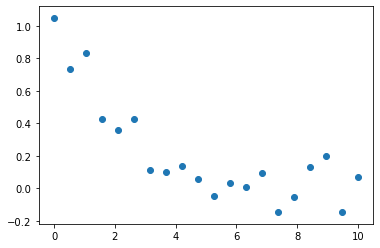

In [158]:
x = np.linspace(0, 10, 20)

def func(x, params):
    return params['y0'].value + np.exp(-params['k'].value * x)

np.random.seed(5)
y = func(x, params) + np.random.normal(scale=0.1, size=x.shape[0])

plt.scatter(x, y)
plt.show()

In [159]:
params['y0'].value = 0
params['k'].value = 2
params

name,value,initial value,min,max,vary
y0,0.00000000,0,-inf,inf,True
k,2.00000000,0.5,0.00000000,inf,True


In [160]:
def residuals(params):
    y_fit = func(x, params)
    
    r = y - y_fit
    return r
#     return (r ** 2).sum()
    

minimizer = lmfit.Minimizer(residuals, params)


kws = {'ftol': 1e-10, 'xtol': 1e-10, 'gtol': 1e-10, 'loss': 'soft_l1', 'verbose': 2}
# kws = {'ftol': 1e-10, 'xtol': 1e-10, 'gtol': 1e-10, 'loss': 'linear', 'verbose': 2}


last_result = minimizer.minimize(method='least_squares', **kws)  # minimize the residuals
params = last_result.params
params

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.9621e-01                                    2.62e+00    
       1              2         2.0840e-01      3.88e-01       1.09e+00       6.59e-01    
       2              3         1.4139e-01      6.70e-02       4.79e-01       1.05e+00    
       3              4         1.1257e-01      2.88e-02       5.29e-02       2.02e-02    
       4              5         1.1248e-01      9.04e-05       1.63e-02       8.22e-03    
       5              6         1.1247e-01      1.21e-05       6.12e-03       1.20e-03    
       6              7         1.1247e-01      1.88e-06       2.46e-03       1.11e-03    
       7              8         1.1247e-01      2.92e-07       9.71e-04       2.03e-04    
       8              9         1.1247e-01      4.67e-08       3.89e-04       1.73e-04    
       9             10         1.1247e-01      7.46e-09       1.55e-04       3.27e-05    

name,value,standard error,relative error,initial value,min,max,vary
y0,-0.00497255,0.04822528,(969.83%),0,-inf,inf,True
k,0.47514859,0.10265169,(21.60%),2,0.00000000,inf,True


In [161]:
lmfit.report_fit(last_result)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 14
    # data points      = 20
    # variables        = 2
    chi-square         = 0.22652903
    reduced chi-square = 0.01258495
    Akaike info crit   = -85.6122890
    Bayesian info crit = -83.6208245
[[Variables]]
    y0: -0.00497255 +/- 0.04822528 (969.83%) (init = 0)
    k:   0.47514859 +/- 0.10265169 (21.60%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(y0, k) =  0.851


In [166]:
values = np.asarray([par[1].value for par in params.items()])
n_samples = 10000
x_fit = np.linspace(-1, 15, 1000)

X = multivariate_normal.rvs(mean=values, cov=last_result.covar, size=n_samples)
func_samples = np.zeros((n_samples, x_fit.shape[0]))
for i in range(n_samples):
    func_samples[i] = X[i, 0] + np.exp(-X[i, 1] * x_fit)

q95 = np.quantile(func_samples, (0.025, 0.975), axis=0)
q68 = np.quantile(func_samples, (0.159, 0.841), axis=0)


In [168]:
X.shape

(10000, 2)

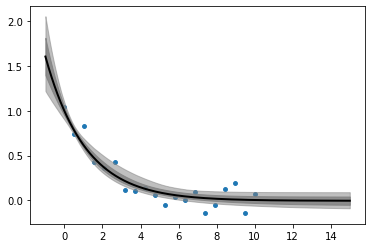

In [169]:
plt.scatter(x, y, s=15)

plt.plot(x_fit, func(x_fit, params), lw=2, color='black')
plt.fill_between(x_fit, q68[0], q68[1], alpha=0.8, color='gray')
plt.fill_between(x_fit, q95[0], q95[1], alpha=0.5, color='gray')

plt.show()